# Adding Dependences

In [32]:
using DelimitedFiles
using Plots
include("../../init/extract_info.jl")

plot_compare (generic function with 1 method)

In [33]:
k = 0.004
range_corr = 0.8
ext_value = false

false

In [34]:
id = Float64.(readdlm("T_150000/rmax_3.5_s_1.9/k_$(k)/Test_Initial.xyz")[3:end,1])
X_f = Float64.(readdlm("T_150000/rmax_3.5_s_1.9/k_$(k)/Test_Final.xyz")[3:end,2:4])

# Finding the center of mass
X_center = sum(X_f, dims=1)./ size(X_f[:,1])

# # Moving two aggregates to the center of mass
X_f = X_f - repeat(X_center ,size(X_f)[1])

# Cilindrical Coordinates
X_f_cil = zeros(size(X_f)[1],3)
X_f_cil[:,1] = sqrt.(sum(X_f .^ 2, dims=2))
X_f_cil[:,2:3]  = mod.(atan.(X_f[:,2:3] ./ X_f[:,1]) .+ pi .* (X_f[:,1] .< 0), 2*pi);

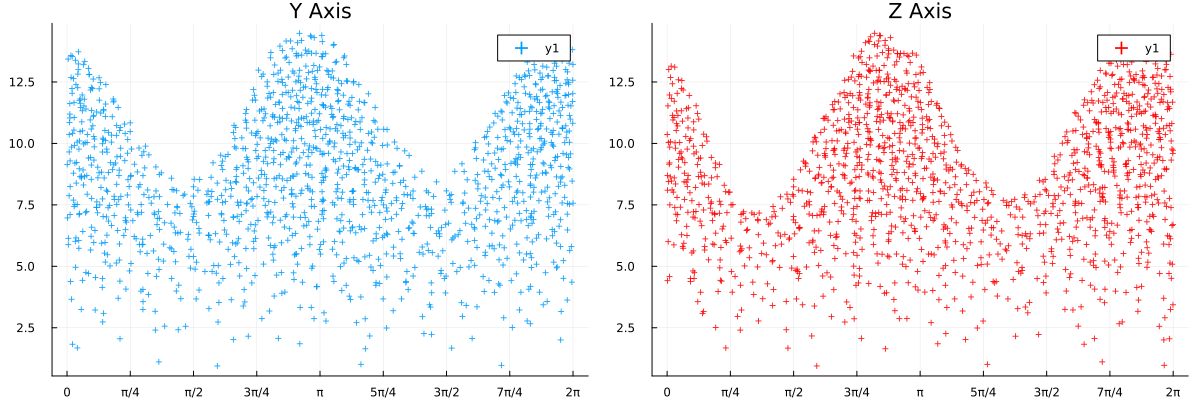

In [35]:
p1 = scatter(
    X_f_cil[:,2], 
    X_f_cil[:,1],  
    shape=[:+ :o :utri], 
    markersize=3,
    xticks = (0:pi/4:2*pi, ["0","π/4","π/2","3π/4","π","5π/4","3π/2","7π/4","2π"])
)

p2 = scatter(
    X_f_cil[:,3], 
    X_f_cil[:,1],  
    shape=[:+ :o :utri], 
    markersize=3,
    mc=:red,
    xticks = (0:pi/4:2*pi, ["0","π/4","π/2","3π/4","π","5π/4","3π/2","7π/4","2π"])
)

plot!(p1, p2,
    size=(1200,400),
    title=["Y Axis" "Z Axis"]
)

In [36]:
if ext_value
    X_f_cil = X_f_cil[abs.(X_f_cil[:,1] .- findmax(X_f_cil[:,1])[1]) .> 0.5,:]
end
# corr = X_f_cil[findmax(X_f_cil[:,1])[2],2:3] .- pi/2
corr = X_f_cil[findmax(X_f_cil[:,1])[2],2:3]
corr_mat = repeat(corr', size(X_f_cil,1))

X_f_cil[:,2:3] = mod.(X_f_cil[:,2:3] - corr_mat, 2*pi);

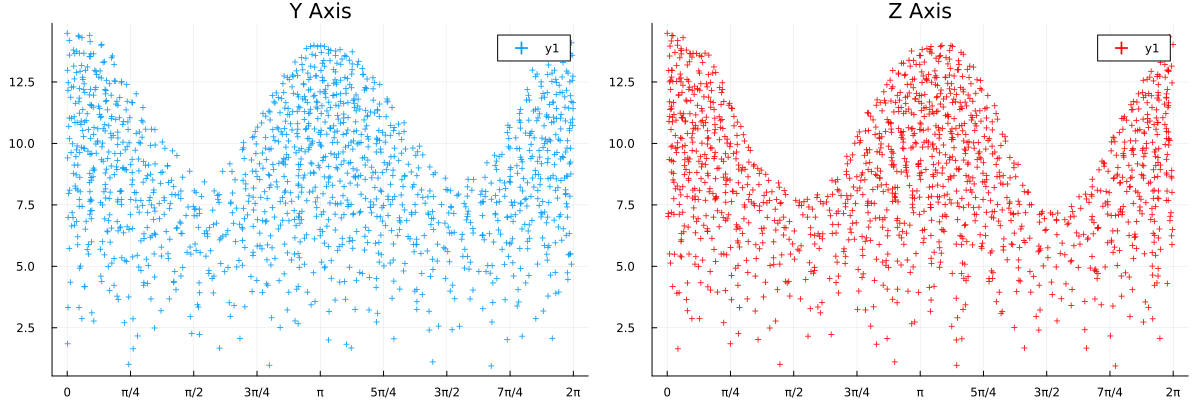

In [37]:
p1 = scatter(
    X_f_cil[:,2], 
    X_f_cil[:,1],  
    shape=[:+ :o :utri], 
    markersize=3,
    xticks = (0:pi/4:2*pi, ["0","π/4","π/2","3π/4","π","5π/4","3π/2","7π/4","2π"])
)

p2 = scatter(
    X_f_cil[:,3], 
    X_f_cil[:,1],  
    shape=[:+ :o :utri], 
    markersize=3,
    mc=:red,
    xticks = (0:pi/4:2*pi, ["0","π/4","π/2","3π/4","π","5π/4","3π/2","7π/4","2π"])
)

plot!(p1, p2,
    size=(1200,400),
    title=["Y Axis" "Z Axis"]
)

In [38]:
X_func = zeros(size(X_f_cil))
X_func[:,1] = X_f_cil[:,1]
X_func[:,2:3] = cos.(2 .* X_f_cil[:,2:3])

1492×2 Matrix{Float64}:
 0.575423   0.165248
 0.666348  -0.0851418
 0.726595  -0.341754
 0.758053   0.264014
 0.825301   0.0389442
 0.907242  -0.16831
 0.939275  -0.430249
 0.877677   0.3986
 0.916614   0.197448
 0.978411   0.0210791
 0.999269  -0.255454
 0.974746   0.357803
 0.999679   0.20209
 ⋮         
 0.847389  -0.509547
 0.356642  -0.999215
 0.952906  -0.82885
 0.920694  -0.610042
 0.958803  -0.308216
 0.242149  -0.911664
 0.670668  -0.718257
 0.986733  -0.450605
 0.999133  -0.275439
 0.287826  -0.613899
 0.764856  -0.419787
 0.902006  -0.338175

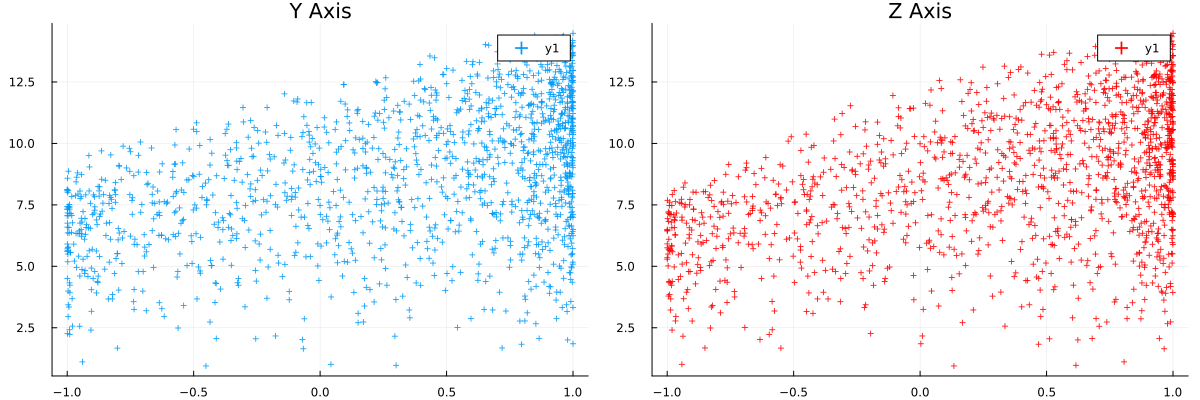

In [45]:
p1 = scatter(
    X_func[:,2], 
    X_func[:,1],  
    shape=[:+ :o :utri], 
    markersize=3,
)

p2 = scatter(
    X_func[:,3], 
    X_func[:,1],  
    shape=[:+ :o :utri], 
    markersize=3,
    mc=:red,
)

plot!(p1, p2,
    size=(1200,400),
    title=["Y Axis" "Z Axis"]
)

In [73]:
r_a = findmax(X_func[X_func[:,2] .< -0.99,:][:,1])[1]
r_b = findmax(X_func[X_func[:,2] .> 0.99,:][:,1])[1]

14.480884243662247

In [77]:
A = (r_a - r_b)/2
B = (r_a + r_b)/2

11.675519712461089

In [78]:
Max = B + A
Min = B - A
hcat(Max, Min)

1×2 Matrix{Float64}:
 8.87016  14.4809

In [40]:
# around the Z-axis would be
#     |cos θ   −sin θ   0| |x|   |x cos θ − y sin θ|   |x'|
#     |sin θ    cos θ   0| |y| = |x sin θ + y cos θ| = |y'|
#     |  0       0      1| |z|   |        z        |   |z'|

# around the Y-axis would be
#     | cos θ    0   sin θ| |x|   | x cos θ + z sin θ|   |x'|
#     |   0      1       0| |y| = |         y        | = |y'|
#     |−sin θ    0   cos θ| |z|   |−x sin θ + z cos θ|   |z'|

# around the X-axis would be
#     |1     0           0| |x|   |        x        |   |x'|
#     |0   cos θ    −sin θ| |y| = |y cos θ − z sin θ| = |y'|
#     |0   sin θ     cos θ| |z|   |y sin θ + z cos θ|   |z'|

In [41]:
# mat_z = [ cos(corr[1]) -sin(corr[1]) 0 ; sin(corr[1])  cos(corr[1]) 0 ; 0 0 1 ]
# mat_y = [ cos(corr[2]) 0 sin(corr[2]); 0 1 0 ; -sin(corr[2]) 0  cos(corr[2]) ]

# Rot = mat_z * mat_y
# X_f_2 = (Rot * X_f')';

# Rotating final conditions

In [42]:
# p1 = scatter(
#     X_f[:,2], 
#     X_f[:,1],  
#     shape=[:+ :o :utri], 
#     markersize=3,
#     # xticks = 0:pi/4:2*pi
# )

# p2 = scatter(
#     X_f[:,3], 
#     X_f[:,1],  
#     shape=[:+ :o :utri], 
#     markersize=3,
#     mc=:red,
#     # xticks = 0:pi/4:2*pi
# )
# p3 = scatter(
#     X_f_2[:,2], 
#     X_f_2[:,1],  
#     shape=[:+ :o :utri], 
#     markersize=3,
#     # xticks = 0:pi/4:2*pi
# )

# p4 = scatter(
#     X_f_2[:,3], 
#     X_f_2[:,1],  
#     shape=[:+ :o :utri], 
#     markersize=3,
#     mc=:red,
#     # xticks = 0:pi/4:2*pi
# )
# plot!(p1, p2, p3,p4,
#     size=(1200,1200),
#     title=["Y Axis(Before)" "Z Axis(Before)" "Y Axis(After)" "Z Axis(After)"],
#     layout = 4
# )

In [43]:
# open("TEST_Rotate.xyz"; write=true) do f
#     write(f, "$(size(X_f_2, 1))\n")
#     write(f, "Rotate Testing\n")
#     writedlm(f,hcat(id, X_f_2), ' ')
# end

In [44]:
# run(`paraview T_150000/rmax_3.5_s_1.9/k_$(k)/Test_Initial.xyz T_150000/rmax_3.5_s_1.9/k_$(k)/Test_Final.xyz TEST_Rotate.xyz`)